In [1]:
import random
import torch
import numpy as np
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
%matplotlib inline

C:\Users\Usuario\AppData\Roaming\Python\Python36\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Usuario\AppData\Roaming\Python\Python36\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Usuario\AppData\Roaming\Python\Python36\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Setting up the environment
env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe")
# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# Get environment info
env_info = env.reset(train_mode=True)[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# Obtaining environment info
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)
# Setting up the Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

In [4]:
def dqn(n_episodes=4000, max_t=3000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps).item()
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}\t Max Score:{}'.format(i_episode, np.mean(scores_window), np.max(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\t Max Score:{}'.format(i_episode, np.mean(scores_window), np.max(scores_window)))
        if np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

Episode 100	Average Score: 0.54	 Max Score:5.0
Episode 200	Average Score: 2.87	 Max Score:10.0
Episode 300	Average Score: 5.78	 Max Score:13.0
Episode 400	Average Score: 7.68	 Max Score:15.0
Episode 500	Average Score: 11.22	 Max Score:18.0
Episode 600	Average Score: 13.50	 Max Score:23.0
Episode 700	Average Score: 12.53	 Max Score:24.0
Episode 800	Average Score: 12.66	 Max Score:22.0
Episode 900	Average Score: 13.49	 Max Score:24.0
Episode 1000	Average Score: 12.74	 Max Score:23.0
Episode 1100	Average Score: 13.29	 Max Score:24.0
Episode 1200	Average Score: 14.44	 Max Score:22.0
Episode 1300	Average Score: 13.58	 Max Score:21.0
Episode 1400	Average Score: 13.45	 Max Score:22.0
Episode 1500	Average Score: 13.22	 Max Score:21.0
Episode 1600	Average Score: 13.61	 Max Score:26.0
Episode 1700	Average Score: 14.60	 Max Score:23.0
Episode 1800	Average Score: 14.86	 Max Score:23.0
Episode 1806	Average Score: 15.05	 Max Score:23.0
Environment solved in 1706 episodes!	Average Score: 15.05


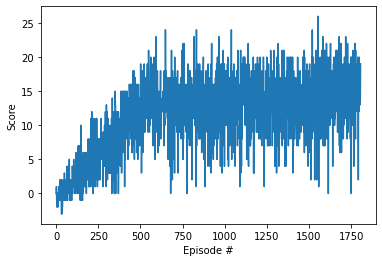

In [5]:
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [6]:
env.close()